In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import statsmodels.api as sm

from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import RFE
from sklearn import * 

In [2]:
#plt.savefig('../../../data/Clean_data.png');

In [3]:
df = pd.read_csv('../../../data/Clean_data.csv')

In [4]:
df = df.dropna()
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,Seattle,Snoqualmie,Woodinville,sqft_living_diff,sqft_lot_diff,year,x0_fall,x0_spring,x0_summer,x0_winter
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0.0,3.0,7.0,...,1.0,0.0,0.0,-160.0,0.0,2014.0,1.0,0.0,0.0,0.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0.0,3.0,7.0,...,1.0,0.0,0.0,880.0,-397.0,2014.0,0.0,0.0,0.0,1.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0.0,3.0,6.0,...,0.0,0.0,0.0,-1950.0,1938.0,2015.0,0.0,0.0,0.0,1.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0.0,5.0,7.0,...,1.0,0.0,0.0,600.0,0.0,2014.0,0.0,0.0,0.0,1.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0.0,3.0,8.0,...,0.0,0.0,0.0,-120.0,577.0,2015.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21414,700000.0,3.0,2.50,2230.0,4006.0,2.0,0,0.0,3.0,8.0,...,1.0,0.0,0.0,0.0,-174.0,2015.0,0.0,1.0,0.0,0.0
21415,800000.0,4.0,3.25,3540.0,159430.0,2.0,0,0.0,3.0,9.0,...,0.0,0.0,0.0,1600.0,-232610.0,2014.0,0.0,0.0,0.0,1.0
21416,899000.0,4.0,3.50,2490.0,5500.0,2.0,0,0.0,3.0,9.0,...,1.0,0.0,0.0,780.0,0.0,2015.0,0.0,0.0,1.0,0.0
21417,465750.0,3.0,2.50,2670.0,4534.0,2.0,0,0.0,3.0,9.0,...,0.0,0.0,0.0,-370.0,-545.0,2014.0,0.0,0.0,0.0,1.0


In [5]:
df['waterfront'] = df['waterfront'].astype('bool')
df2 = df[df["grade"] <= 6]
df2 =df

In [6]:
df2

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,Seattle,Snoqualmie,Woodinville,sqft_living_diff,sqft_lot_diff,year,x0_fall,x0_spring,x0_summer,x0_winter
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,False,0.0,3.0,7.0,...,1.0,0.0,0.0,-160.0,0.0,2014.0,1.0,0.0,0.0,0.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,False,0.0,3.0,7.0,...,1.0,0.0,0.0,880.0,-397.0,2014.0,0.0,0.0,0.0,1.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,False,0.0,3.0,6.0,...,0.0,0.0,0.0,-1950.0,1938.0,2015.0,0.0,0.0,0.0,1.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,False,0.0,5.0,7.0,...,1.0,0.0,0.0,600.0,0.0,2014.0,0.0,0.0,0.0,1.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,False,0.0,3.0,8.0,...,0.0,0.0,0.0,-120.0,577.0,2015.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21414,700000.0,3.0,2.50,2230.0,4006.0,2.0,False,0.0,3.0,8.0,...,1.0,0.0,0.0,0.0,-174.0,2015.0,0.0,1.0,0.0,0.0
21415,800000.0,4.0,3.25,3540.0,159430.0,2.0,False,0.0,3.0,9.0,...,0.0,0.0,0.0,1600.0,-232610.0,2014.0,0.0,0.0,0.0,1.0
21416,899000.0,4.0,3.50,2490.0,5500.0,2.0,False,0.0,3.0,9.0,...,1.0,0.0,0.0,780.0,0.0,2015.0,0.0,0.0,1.0,0.0
21417,465750.0,3.0,2.50,2670.0,4534.0,2.0,False,0.0,3.0,9.0,...,0.0,0.0,0.0,-370.0,-545.0,2014.0,0.0,0.0,0.0,1.0


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21242 entries, 0 to 21418
Data columns (total 47 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             21242 non-null  float64
 1   bedrooms          21242 non-null  float64
 2   bathrooms         21242 non-null  float64
 3   sqft_living       21242 non-null  float64
 4   sqft_lot          21242 non-null  float64
 5   floors            21242 non-null  float64
 6   waterfront        21242 non-null  bool   
 7   view              21242 non-null  float64
 8   condition         21242 non-null  float64
 9   grade             21242 non-null  float64
 10  sqft_above        21242 non-null  float64
 11  basement          21242 non-null  int64  
 12  yr_built          21242 non-null  float64
 13  yr_renovated      21242 non-null  float64
 14  zipcode           21242 non-null  float64
 15  lat               21242 non-null  float64
 16  long              21242 non-null  float6

In [8]:
df2['grade'].value_counts()

7.0     8858
8.0     5964
9.0     2572
6.0     1993
10.0    1107
11.0     387
5.0      233
12.0      87
4.0       27
13.0      13
3.0        1
Name: grade, dtype: int64

In [9]:
X = df2.drop(['price'], axis=1)
y = df2.price

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22)

base_lr = LinearRegression()
base_lr.fit(X_train,y_train)

kcross_base = cross_val_score(base_lr,X_train,y_train,cv=5)

kcross_base

array([0.75141326, 0.75668434, 0.74779789, 0.75343264, 0.73762877])

In [10]:
base_lr.score(X,y)

0.7522740789379291

In [11]:
X = df2.drop(['price'], axis=1)
y = df2.price

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

fit_lr = LinearRegression()
fit_lr.fit(X_train,y_train)

kcross_fit = cross_val_score(fit_lr,X_train,y_train,cv=5)

kcross_fit

array([0.75143732, 0.7567259 , 0.74779353, 0.753409  , 0.7376123 ])

In [12]:
fit_lr.score(X_train,y_train)

0.7525240060929628

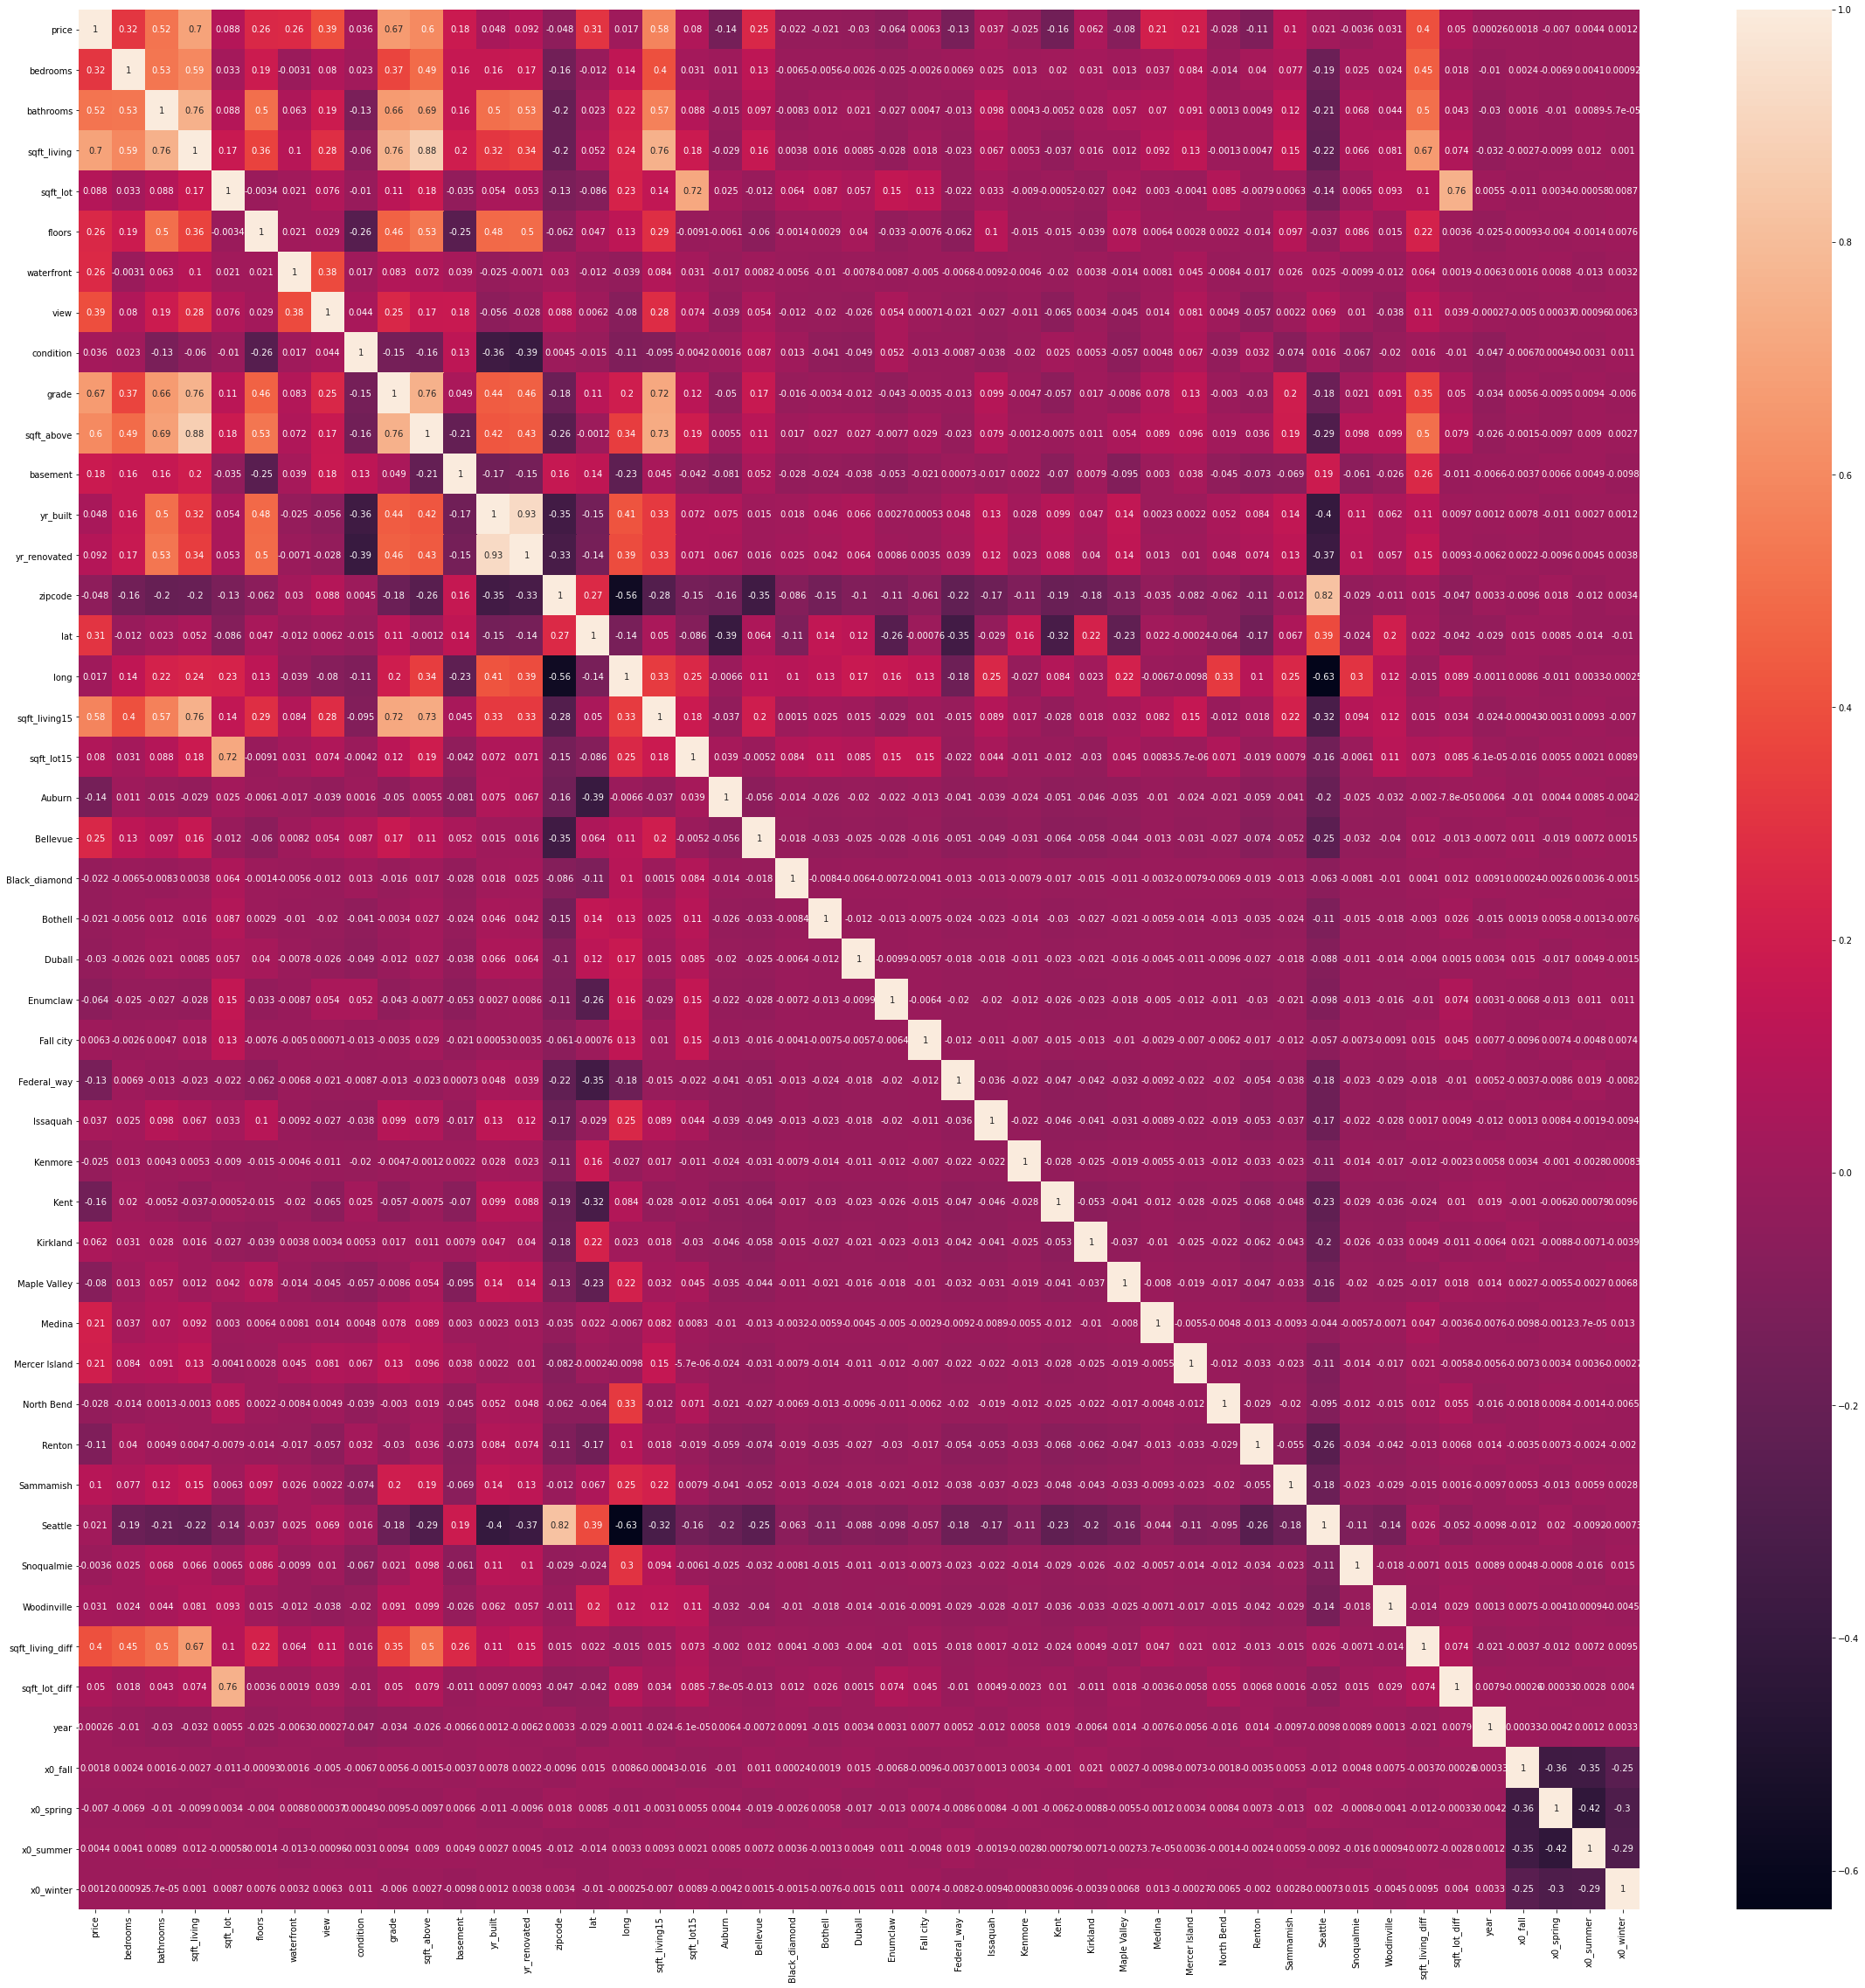

In [13]:
fig, ax = plt.subplots(figsize=(40,40))    
sns.heatmap(df2.corr(), annot=True);

In [14]:
X = df2.drop(['price'],axis =1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
lr_rfe = LinearRegression()
select = RFE(lr_rfe, n_features_to_select=22)
select.fit(X=X, y=df2['price'])
list(zip(df2.columns,select.support_))

[('price', False),
 ('bedrooms', False),
 ('bathrooms', True),
 ('sqft_living', False),
 ('sqft_lot', False),
 ('floors', False),
 ('waterfront', False),
 ('view', False),
 ('condition', True),
 ('grade', False),
 ('sqft_above', False),
 ('basement', False),
 ('yr_built', False),
 ('yr_renovated', False),
 ('zipcode', False),
 ('lat', False),
 ('long', True),
 ('sqft_living15', False),
 ('sqft_lot15', True),
 ('Auburn', True),
 ('Bellevue', False),
 ('Black_diamond', True),
 ('Bothell', True),
 ('Duball', True),
 ('Enumclaw', False),
 ('Fall city', True),
 ('Federal_way', False),
 ('Issaquah', True),
 ('Kenmore', True),
 ('Kent', True),
 ('Kirkland', True),
 ('Maple Valley', True),
 ('Medina', True),
 ('Mercer Island', True),
 ('North Bend', True),
 ('Renton', False),
 ('Sammamish', True),
 ('Seattle', True),
 ('Snoqualmie', True),
 ('Woodinville', True),
 ('sqft_living_diff', True),
 ('sqft_lot_diff', False),
 ('year', False),
 ('x0_fall', False),
 ('x0_spring', False),
 ('x0_summer',

In [15]:
X = df2.drop(['price','x0_fall','x0_spring'], axis=1)
y = df2.price

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

drop_1_lr = LinearRegression()
drop_1_lr.fit(X_train,y_train)

kcross_drop_1 = cross_val_score(drop_1_lr,X_train,y_train,cv=5)

kcross_drop_1

array([0.75140207, 0.75673096, 0.74780683, 0.75341031, 0.73765244])

In [16]:
drop_1_lr.score(X_train,y_train)

0.7525217439398046

In [17]:
0.5621501778823108

0.5621501778823108

In [18]:
X = df2.drop(['price','sqft_living15','sqft_lot15'], axis=1)
y = df2[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_scale = StandardScaler()
y_train = y_scale.fit_transform(y_train)
y_test = y_scale.transform(y_test)

y_scale_lr = LinearRegression()
y_scale_lr.fit(X_train,y_train)

kcross_y_scale = cross_val_score(y_scale_lr,X_train,y_train,cv=5)

print(kcross_y_scale)
print(y_scale_lr.score(X_train,y_train))

[0.75141706 0.75669089 0.74778459 0.75342783 0.73763059]
0.7525311548041451


In [19]:
y_scale_lr.score(X_train,y_train)

0.7525311548041451

In [20]:
0.7191236525427418

0.7191236525427418

In [21]:
X = df2.drop(['price'],axis=1)
y = df2[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y)
y_train = np.log(y_train)
y_test = np.log(y_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_scale = StandardScaler()
y_train = y_scale.fit_transform(y_train)
y_test = y_scale.transform(y_test)

y_scale_lr = LinearRegression()
y_scale_lr.fit(X_train,y_train)
kcross_y_scale = cross_val_score(y_scale_lr,X_train,y_train,cv=5)

print(kcross_y_scale)
print(y_scale_lr.score(X_train,y_train))

[0.82929486 0.81419079 0.81568202 0.81990808 0.82153359]
0.821477147335989


In [22]:
y_scale_lr.score(X_train,y_train)

0.821477147335989

In [23]:
0.7843205625777586

0.7843205625777586

In [24]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,Seattle,Snoqualmie,Woodinville,sqft_living_diff,sqft_lot_diff,year,x0_fall,x0_spring,x0_summer,x0_winter
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,False,0.0,3.0,7.0,...,1.0,0.0,0.0,-160.0,0.0,2014.0,1.0,0.0,0.0,0.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,False,0.0,3.0,7.0,...,1.0,0.0,0.0,880.0,-397.0,2014.0,0.0,0.0,0.0,1.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,False,0.0,3.0,6.0,...,0.0,0.0,0.0,-1950.0,1938.0,2015.0,0.0,0.0,0.0,1.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,False,0.0,5.0,7.0,...,1.0,0.0,0.0,600.0,0.0,2014.0,0.0,0.0,0.0,1.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,False,0.0,3.0,8.0,...,0.0,0.0,0.0,-120.0,577.0,2015.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21414,700000.0,3.0,2.50,2230.0,4006.0,2.0,False,0.0,3.0,8.0,...,1.0,0.0,0.0,0.0,-174.0,2015.0,0.0,1.0,0.0,0.0
21415,800000.0,4.0,3.25,3540.0,159430.0,2.0,False,0.0,3.0,9.0,...,0.0,0.0,0.0,1600.0,-232610.0,2014.0,0.0,0.0,0.0,1.0
21416,899000.0,4.0,3.50,2490.0,5500.0,2.0,False,0.0,3.0,9.0,...,1.0,0.0,0.0,780.0,0.0,2015.0,0.0,0.0,1.0,0.0
21417,465750.0,3.0,2.50,2670.0,4534.0,2.0,False,0.0,3.0,9.0,...,0.0,0.0,0.0,-370.0,-545.0,2014.0,0.0,0.0,0.0,1.0


[[1.         0.66593619]
 [0.66593619 1.        ]]


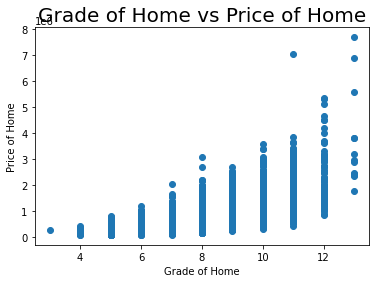

In [29]:

x = df['grade']
y = df['price']

print(np.corrcoef(x, y))

plt.scatter(x, y) 
plt.title('Grade of Home vs Price of Home',fontsize = 20)
plt.xlabel('Grade of Home',fontsize = 10)
plt.ylabel('Price of Home',fontsize = 10)
#plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='yellow')
plt.savefig('../../../images/data_vs_grade.png')
plt.show();

